<a href="https://colab.research.google.com/github/DanhNguyen21/DanhNguyen21/blob/main/B%C3%A0i_4_Nh%E1%BA%ADn_d%E1%BA%A1ng_ng%C6%B0%E1%BB%9Di_d%C3%B9ng_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Công Danh - 19146164 Lớp AI tối thứ 7 Link google drive: https://drive.google.com/drive/folders/1385PTDJZQkbzmEKVpm-u-QkW94r1ZLia?usp=sharing

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/BTCNN/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 90 images belonging to 3 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/BTCNN/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 90 images belonging to 3 classes.


In [ ]:
training_data.class_indices

{'Danh': 0, 'Dung': 1, 'Trinh': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_data,epochs=100,batch_size=64,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) 

Epoch 1/100
3/3 [==============================] - 3s 911ms/step - loss: 9.9070 - accuracy: 0.4778 - val_loss: 1.0678 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 2s 696ms/step - loss: 1.1597 - accuracy: 0.5000 - val_loss: 0.5747 - val_accuracy: 0.9444
Epoch 3/100
3/3 [==============================] - 2s 687ms/step - loss: 0.5742 - accuracy: 0.8222 - val_loss: 0.3111 - val_accuracy: 0.9556
Epoch 4/100
3/3 [==============================] - 2s 666ms/step - loss: 0.1962 - accuracy: 0.9667 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 2s 671ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.2178 - val_accuracy: 0.9333
Epoch 6/100
3/3 [==============================] - 2s 709ms/step - loss: 0.0140 - accuracy: 0.9889 - val_loss: 5.5353e-04 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 2s 670ms/step - loss: 0.0695 - accuracy: 0.9889 - val_loss: 5.3514e-05 - val_accuracy: 1.0000
Epoch

<function matplotlib.pyplot.show>

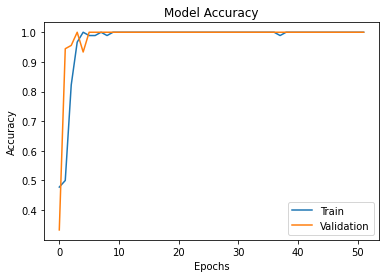

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhan_dien_nguoi.h5")

In [ ]:
model_nhandien=load_model('Nhan_dien_nguoi.h5')

Trinh


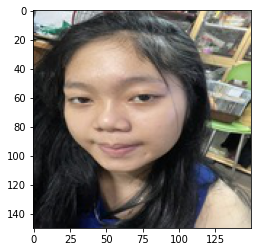

In [ ]:
img=load_img("/content/drive/MyDrive/BTCNN/anhthu/Trinh (1).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Danh'
if round(result[0][1])==1:
  prediction='Dung'
if round(result[0][2])==1:
  prediction='Trinh'
print(prediction)

Dung


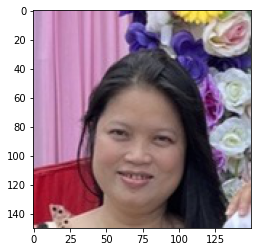

In [ ]:
img=load_img("/content/drive/MyDrive/BTCNN/anhthu/dungt (1).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Danh'
if round(result[0][1])==1:
  prediction='Dung'
if round(result[0][2])==1:
  prediction='Trinh'
print(prediction)

Danh


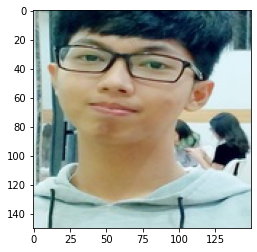

In [ ]:
img=load_img("/content/drive/MyDrive/BTCNN/anhthu/dn (1).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Danh'
if round(result[0][1])==1:
  prediction='Dung'
if round(result[0][2])==1:
  prediction='Trinh'
print(prediction)